## MC
------------

Monte Carlo simulations are a powerful and versatile tool in portfolio optimization, offering a probabilistic approach to decision-making under uncertainty.
It simulations generate a wide range of possible future price scenarios for assets based on historical data, statistical models, or assumed distributions (e.g., normal distribution of returns), these scenarios incorporate randomness to reflect the uncertainty of real-world market movements.
For each simulated scenario, portfolio metrics such as returns, volatility (standard deviation), and risk-adjusted measures (e.g., Sharpe ratio) are computed. The simulations provide a distribution of potential outcomes, enabling investors to assess the likelihood of achieving specific return or risk thresholds.
> The goal is to identify the "efficient frontier," which represents portfolios offering the highest expected return for a given level of risk

By simulating extreme market conditions, Monte Carlo methods allow for stress testing of portfolio resilience, this helps in understanding the potential impact of rare events (e.g., financial crises) and optimizing portfolios to withstand such shocks.

>By simulating numerous possible outcomes and exploring vast combinations of portfolio allocations, Monte Carlo methods enable investors to optimize portfolios that are resilient, efficient, and tailored to their risk-return profiles.


---------
> SIMULATE FUTURE ASSET PRICES

> ESTIMATE PORTFOLIO METRICS

> EXPLOR THE EFFICIENT FRONTIER

> STRESS TESTING SCENARIO ANALYSIS

> DYNAMIC REBALANCING

---
hidden info
<risk assessment>
<optimizating risk adjusted returns>
<incorporating nonlinear constrains>
<forcasting correlations and diversification>
<evaluating alternative strategies>
<sensitivity analysis>

---
### MODERN PORTFOLIO THEORY

In [3]:
import numpy as np
import pandas as pd
#from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import datetime as dt
from scipy.optimize import minimize
#from stock_forecasting.config import PROCESSED_DATA_DIR
import pickle

In [ ]:
%pip install setuptools==62.0.0 wheel

In [ ]:
%pip install --upgrade pip

In [ ]:
%pip install -e ..

In [ ]:
from stock_forecasting.features import *
from stock_forecasting.plots import *
from stock_forecasting.config import PROCESSED_DATA_DIR, RAW_DATA_DIR, MODELS_DIR
from stock_forecasting.modeling.train import train_lstm, predict

---------------

In [ ]:
%pwd

'c:\\Users\\Daniela\\Desktop\\Fac\\3ºano\\Lab_IACD\\Project2\\stocks-prediction-labia\\notebooks'

In [7]:
from pathlib import Path

PROJ_ROOT = Path('c:\\Users\\Daniela\\Desktop\\Fac\\3ºano\\Lab_IACD\\Project2\\stocks-prediction-labia')
# logger.info(f"PROJ_ROOT path is: {PROJ_ROOT}")

DATA_DIR = PROJ_ROOT / "data"
RAW_DATA_DIR = DATA_DIR / "raw"
INTERIM_DATA_DIR = DATA_DIR / "interim"
PROCESSED_DATA_DIR = DATA_DIR / "processed"
EXTERNAL_DATA_DIR = DATA_DIR / "external"
MODELS_DIR = PROJ_ROOT / "models"

In [ ]:
df = pdr.DataReader('^SPX', data_source='stooq', start='2010-1-1', end='2023-12-31')

## Using Both Historical and Predicted Data
### HISTORICAL DATA
 Use it to estimate parameters like volatility, correlations, and historical patterns of returns
Generate baseline Monte Carlo simulations for comparison
### PREDICTED DATA
Integrate LSTM predictions for January 2024 into the Monte Carlo framework as the expected mean return or as one of the scenarios.
Use these predictions to adjust simulations for expected future trends.
### Hybrid Approach:
Combine the two by using historical data for broader context and volatility modeling, while integrating LSTM predictions as a factor influencing January 2024's specific simulations.

Data n filtrada

In [ ]:
with open(PROCESSED_DATA_DIR / "filtered.pkl", "rb") as  f:
    fuu = pickle.load(f)

print(fuu)

In [ ]:
fuu = fuu.xs("Close", level="Price", axis=1).pct_change()
fuu = fuu[fuu.index < "2024-01-01"]
print(fuu)

Data filtrada

In [ ]:
with open(MODELS_DIR / "predictions.pkl", "rb") as  f:
    foo = pickle.load(f)

print(foo)

### Estimate Parameters:
calculate mean return and standard diviation

estimate the correlation matrix for all stocks

In [ ]:
def get_data(stocks, start, end):
    # stockData = pdr.get_data_yahoo(stocks, start=start, end=end)
    # stockData = stockData['Close']
    stockData = pd.read_pickle(PROCESSED_DATA_DIR / "filtered.pkl")
    returns = stockData.xs("Close", level="Price", axis=1).pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
stocks = [stock + '.AX' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 300)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)

print(meanReturns)

#give random weights to portfolio
''' '''
weights = np.random.random(len(meanReturns))
weights/=np.sum(weights)

print(weights)



Ticker
HAL     0.000488
K       0.000235
IRM     0.000732
HES     0.000624
KEY     0.000660
          ...   
DLR     0.000604
DD      0.000419
SWK     0.000461
MSFT    0.000940
ROK     0.000787
Length: 392, dtype: float64
[4.25189661e-03 3.20241338e-03 3.26973078e-03 1.31475715e-03
 3.63126755e-03 3.43335439e-04 3.45523901e-03 4.93396523e-03
 4.02547216e-03 1.11214046e-03 2.58416182e-03 1.98603091e-03
 4.40077371e-03 1.91346357e-04 2.07493061e-03 4.19861939e-03
 9.61268858e-04 1.10921475e-03 1.03025576e-03 3.60235442e-03
 4.24976900e-03 4.43924208e-03 4.44721448e-03 1.76027753e-03
 2.14675374e-03 4.59750972e-03 4.23645747e-03 1.82343819e-03
 7.27335704e-04 3.63024600e-03 3.84417065e-03 4.72334499e-03
 9.54032154e-04 3.55106780e-03 4.41447350e-03 3.14219941e-03
 4.50343107e-03 4.43662883e-03 2.65842409e-03 3.19400416e-04
 3.08686548e-03 3.13095861e-03 2.92750397e-03 2.34974028e-03
 2.04348598e-03 8.86218590e-04 1.18574172e-03 2.77328485e-03
 4.72094111e-03 4.59209757e-03 3.30337906e-03 

#### Instead of using random weigths you can have them based on:

-annual volatility

-minimum variance portfolio

-ERC(Equal Risk Contribution) : Assign weights so that each asset contributes equally to portfolio risk. This is a more advanced form of risk parity.
the idea of the strategy is to find a risk-balanced portfolio such that the risk contribution is the same for all assets of the portfolio

![image.png](attachment:image.png)

The ERC portfolio may be viewed as a portfolio “between” the 1/n portfolio(in this case annual volatility) and the minimum variance portfolio.


In [ ]:
#weights based on anual volatility

raw_data = pd.read_pickle(RAW_DATA_DIR / "raw.pkl")
raw_data = delete_recent(raw_data, threshold=0)
stats = calculate_stock_stats(raw_data)
volatilities = stats["annual_volatility"]

# Invert volatilities
#give more importance to the more stable
inv_vol = 1 / (volatilities + 1e-8) #in case volatilities is 0(not a thig but to be safe)
weights = inv_vol / inv_vol.sum() #ajust so that sum is 1

In [ ]:
#minimum variance portfolio

def minimum_variance_portfolio(cov_matrix):
    n = cov_matrix.shape[0]

    # Objective function: portfolio variance
    def portfolio_variance(w):
        return w.T @ cov_matrix @ w

    # Constraints: weights sum to 1
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

    # Bounds: no short-selling (weights >= 0)
    bounds = [(0, 1) for _ in range(n)]

    # Initial guess: equal weights
    init_weights = np.ones(n) / n

    # Solve optimization problem
    result = minimize(portfolio_variance, init_weights, bounds=bounds, constraints=constraints)
    return result.x

# Compute weights for the minimum variance portfolio
weights = minimum_variance_portfolio(covMatrix)

print("Minimum Variance Portfolio Weights:", weights)


In [ ]:
#ERC


def calculate_erc_weights(cov_matrix):
    n = cov_matrix.shape[0]

    # Objective function to minimize: squared differences in risk contributions
    def objective(w):
        portfolio_vol = np.sqrt(w.T @ cov_matrix @ w)
        marginal_contributions = cov_matrix @ w
        risk_contributions = w * marginal_contributions / portfolio_vol
        # Target: all risk contributions should be equal
        target = portfolio_vol / n
        return np.sum((risk_contributions - target) ** 2)

    # Initial guess: equal weights
    init_weights = np.ones(n) / n

    # Constraints: weights sum to 1
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

    # Bounds: no short-selling (weights >= 0)
    bounds = [(0, 1) for _ in range(n)]

    # Solve optimization
    result = minimize(objective, init_weights, bounds=bounds, constraints=constraints)
    return result.x


weights = calculate_erc_weights(covMatrix)

print("ERC Weights:", weights)


ERC Weights: [0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00

In [ ]:
#ERC 2nd attempt


def calculate_erc_weights_2(cov_matrix):
    """
    Calculate Equal Risk Contribution (ERC) portfolio weights.

    Parameters:
    - cov_matrix (numpy.ndarray): Covariance matrix of asset returns.

    Returns:
    - numpy.ndarray: Portfolio weights for ERC portfolio.
    """
    # Number of assets
    n_assets = cov_matrix.shape[0]

    # Define the risk contribution objective function
    def risk_contribution_objective(weights):
        portfolio_variance = weights.T @ cov_matrix @ weights
        marginal_risks = (cov_matrix @ weights)
        risk_contributions = weights * marginal_risks
        equal_risk = risk_contributions - portfolio_variance / n_assets
        return np.sum(equal_risk**2)

    # Initial guess: Equal weights
    initial_weights = np.ones(n_assets) / n_assets

    # Constraints: Weights sum to 1
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

    # Bounds: Long-only portfolio (weights >= 0)
    bounds = [(0, 1) for _ in range(n_assets)]

    # Optimize
    result = minimize(risk_contribution_objective,
                      initial_weights,
                      method='SLSQP',
                      bounds=bounds,
                      constraints=constraints)

    if result.success:
        return result.x
    else:
        raise ValueError("Optimization did not converge. Try adjusting inputs or constraints.")


weights = calculate_erc_weights_2(covMatrix)

print("ERC Weights:", weights)

ERC Weights: [0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102 0.00255102
 0.00255102 0.00255102 0.00255102 0.00255102 0.00

In [ ]:
def portfolio_volatility(weights, cov_matrix):
    """Calculate portfolio volatility."""
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def risk_contribution(weights, cov_matrix):
    """Calculate risk contribution of each asset."""
    port_vol = portfolio_volatility(weights, cov_matrix)
    marginal_contribution = np.dot(cov_matrix, weights)
    return weights * marginal_contribution / port_vol

def risk_parity_objective(weights, cov_matrix):
    """Objective function for ERC optimization."""
    # Calculate risk contributions
    contributions = risk_contribution(weights, cov_matrix)
    # Target: minimize squared differences from average contribution
    average_contribution = contributions.sum() / len(contributions)
    return np.sum((contributions - average_contribution) ** 2)

def get_erc_weights(cov_matrix):
    """Calculate ERC weights."""
    num_assets = cov_matrix.shape[0]
    initial_weights = np.ones(num_assets) / num_assets  # Start with equal weights
    bounds = [(0, 1) for _ in range(num_assets)]  # No short selling, weights between 0 and 1
    constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}  # Weights sum to 1

    # Minimize the ERC objective function
    result = minimize(
        risk_parity_objective,
        initial_weights,
        args=(cov_matrix,),
        bounds=bounds,
        constraints=constraints,
    )
    return result.x  # Optimized weights

----------------
### generate random scenarions

#### GBM(geometric Brownian motion)
- is a continuous-time stochastic process in which the logarithm of the randomly varying quantity follows a Brownian motion (also called a Wiener process) with drift. It is an important example of stochastic processes satisfying a stochastic differential equation (SDE); in particular, it is used in mathematical finance to model stock prices in the Black–Scholes model.
![image.png](attachment:image.png)

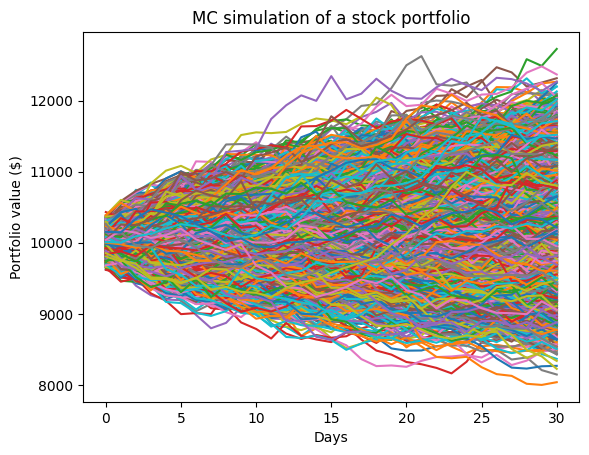

In [ ]:
#MC simulater
#nº of simulations
mc_simes = 5001
T = 31 #days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T #transpose

portfolio_sins = np.full(shape=(T, mc_simes), fill_value=0.0)

initialPortfolio = 10000 #started with initialPortfolio money

for m in range(0, mc_simes):
    #mc loops
    Z = np.random.normal(size=(T, len(weights))) #T com o nº de stocks
    L = np.linalg.cholesky(covMatrix) #lower triangle // nº of stocks by the n of stocks

    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sins[:, m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

plt.plot(portfolio_sins)
plt.ylabel('Portfolio value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

In [ ]:
#MT Carlo with GBM example


### WHAT I NEED
# 1. Parameters and Historical Data
np.random.seed(42)  # For reproducibility

# Sample data: assume 3 stocks with their historical mean returns and volatilities
stock_data = {
    "Stock A": {"mu": 0.12, "sigma": 0.2},
    "Stock B": {"mu": 0.08, "sigma": 0.15},
    "Stock C": {"mu": 0.10, "sigma": 0.18},
}

stocks = list(stock_data.keys())
initial_prices = [100, 100, 100]  # Starting prices of the stocks
time_horizon = 1  # 1 year
num_steps = 252  # Trading days in a year
num_simulations = 1000  # Monte Carlo simulations



### CODE PART
# 2. Simulating GBM
def simulate_gbm(mu, sigma, S0, T, steps, sims):
    dt = T / steps
    prices = np.zeros((steps + 1, sims))
    prices[0] = S0

    for t in range(1, steps + 1):
        Z = np.random.standard_normal(sims)  # Random normal variables
        prices[t] = prices[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    return prices


# Simulate price paths for each stock
simulated_prices = {}
for stock, params in stock_data.items():
    simulated_prices[stock] = simulate_gbm(params["mu"], params["sigma"], 100, time_horizon, num_steps, num_simulations)


# 3. Portfolio Simulation
'''
def simulate_portfolios(num_portfolios, simulated_prices, risk_free_rate=0.03):
    num_stocks = len(simulated_prices)
    final_prices = np.array([simulated_prices[stock][-1] for stock in stocks])  # Final prices from simulations
    expected_returns = final_prices.mean(axis=1) / 100 - 1  # Annualized returns
    cov_matrix = np.cov(final_prices / 100)  # Covariance of final prices

    results = {
        "weights": [],
        "returns": [],
        "volatility": [],
        "sharpe_ratios": []
    }

    for _ in range(num_portfolios):
        weights = np.random.random(num_stocks)
        weights /= np.sum(weights)  # Normalize weights to sum to 1

        portfolio_return = np.dot(weights, expected_returns)
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

        results["weights"].append(weights)
        results["returns"].append(portfolio_return)
        results["volatility"].append(portfolio_volatility)
        results["sharpe_ratios"].append(sharpe_ratio)

    return results


num_portfolios = 10000
portfolio_results = simulate_portfolios(num_portfolios, simulated_prices)
'''

# 3. Portfolio Simulation with ERC
def simulate_portfolios_with_erc(simulated_prices, risk_free_rate=0.03):
    num_stocks = len(simulated_prices)
    final_prices = np.array([simulated_prices[stock][-1] for stock in stocks])  # Final prices from simulations
    expected_returns = final_prices.mean(axis=1) / 100 - 1  # Annualized returns
    cov_matrix = np.cov(final_prices / 100)  # Covariance of final prices

    # Calculate ERC weights
    erc_weights = get_erc_weights(cov_matrix)

    # Evaluate the ERC portfolio
    portfolio_return = np.dot(erc_weights, expected_returns)
    portfolio_volatility = np.sqrt(np.dot(erc_weights.T, np.dot(cov_matrix, erc_weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

    return {
        "weights": erc_weights,
        "return": portfolio_return,
        "volatility": portfolio_volatility,
        "sharpe_ratio": sharpe_ratio,
    }


# Calculate ERC Portfolio
erc_portfolio = simulate_portfolios_with_erc(simulated_prices)
print("ERC Portfolio Allocation:")
for i, stock in enumerate(stocks):
    print(f"{stock}: {erc_portfolio['weights'][i]*100:.2f}%")
print(f"Expected Return: {erc_portfolio['return']*100:.2f}%, Volatility: {erc_portfolio['volatility']*100:.2f}%, Sharpe Ratio: {erc_portfolio['sharpe_ratio']:.2f}")


# 4. Optimal Portfolio
max_sharpe_idx = np.argmax(erc_portfolio["sharpe_ratios"])
optimal_weights = erc_portfolio["weights"][max_sharpe_idx]
optimal_return = erc_portfolio["returns"][max_sharpe_idx]
optimal_volatility = erc_portfolio["volatility"][max_sharpe_idx]


# 5. Visualization
plt.figure(figsize=(10, 6))
plt.scatter(
    erc_portfolio["volatility"],
    erc_portfolio["returns"],
    c=erc_portfolio["sharpe_ratios"],
    cmap="viridis",
    alpha=0.6,
)
plt.colorbar(label="Sharpe Ratio")
plt.scatter(optimal_volatility, optimal_return, c="red", marker="*", s=200, label="Optimal Portfolio")
plt.title("Portfolio Optimization: Risk vs Return")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Expected Return")
plt.legend()
plt.show()


# 6. Display Optimal Portfolio
print("Optimal Portfolio Allocation:")
for i, stock in enumerate(stocks):
    print(f"{stock}: {optimal_weights[i]*100:.2f}%")
print(f"Expected Return: {optimal_return*100:.2f}%, Volatility: {optimal_volatility*100:.2f}%, Sharpe Ratio: {portfolio_results['sharpe_ratios'][max_sharpe_idx]:.2f}")

In [ ]:
#value of risk and conditional value of risk

def mcVar(returns, alpha = 5):
    '''
    input: pandas series of returns
    output: percentile on return distribution to a given confidence level alpha
    '''

    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        raise TypeError("Expected a pandas data series.")


def mcCVar(returns, alpha = 5):
    '''
    input: pandas series of returns
    output: CVar or Expected Shortfall to a given confidence level alpha
    '''

    if isinstance(returns, pd.Series):
        belowVar = returns <= mcVar(returns, alpha=alpha)
        return returns[belowVar].mean()
    else:
        raise TypeError("Expected a pandas data series.")


portResults = pd.Series(portfolio_sins[-1,:])

VaR = initialPortfolio - mcVar(portResults, alpha=5)
CVaR = initialPortfolio - mcCVar(portResults, alpha=5)

print(f'Var ${format(round(VaR, 2))}')  #limite (o valor esperado a perder quando fazer inicial - variancia)
print(f'Var ${format(round(CVaR, 2))}') #risco conditional risc (para baixo do valor obtido em cima)

Var $480.85
Var $671.78


------------
Automating the Monte Carlo Simulations and Showing CAPM Metrics
------------

- Sharpe Ratio: retorno ajustado ao risco
- Cumulative Return: retorno acumulado
- Drawdown: perda máxima

In [ ]:
def calculate_sharpe_ratio(returns, risk_free_rate=0.03):
    excess_returns = returns.mean() - risk_free_rate
    return excess_returns / returns.std()

def calculate_drawdown(portfolio_values):
    cumulative_max = portfolio_values.cummax()
    drawdown = (portfolio_values - cumulative_max) / cumulative_max
    return drawdown.min()

portfolio_values = pd.DataFrame(portfolio_sins)
simulated_returns = portfolio_values.pct_change().dropna()

sharpe_ratio = calculate_sharpe_ratio(simulated_returns.mean(axis=1))
print(f"Sharpe Ratio: {sharpe_ratio:.3f}")

cumulative_return = (portfolio_values.iloc[-1] / portfolio_values.iloc[0] - 1)
print(f"Cumulative Return: {cumulative_return:.3%}")

drawdown = calculate_drawdown(portfolio_values.mean(axis=1))
print(f"Maximum Drawdown: {drawdown:.3%}")

In [2]:
'''
def calculate_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()  #retornos acumulados
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()
    return max_drawdown

plt.figure(figsize=(10, 6))
plt.plot(drawdown, label="Drawdown", color='red')
plt.xlabel("Períodos")
plt.ylabel("Drawdown (%)")
plt.legend()
plt.show()
'''

'\ndef calculate_drawdown(returns):\n    cumulative_returns = (1 + returns).cumprod()  #retornos acumulados\n    peak = cumulative_returns.cummax()\n    drawdown = (cumulative_returns - peak) / peak\n    max_drawdown = drawdown.min()\n    return max_drawdown\n\nplt.figure(figsize=(10, 6))\nplt.plot(drawdown, label="Drawdown", color=\'red\')\nplt.xlabel("Períodos")\nplt.ylabel("Drawdown (%)")\nplt.legend()\nplt.show()\n'

**CAPM - Capital Asset Pricing Model**

Beta mede a volatilidade / risco do portfólio em relação ao movimento do mercado.

Indica o quanto o portfólio tende a se mover em relação ao mercado.

Beta = 1: O portfólio tem o mesmo risco e a mesma volatilidade do mercado. <br>
Beta > 1: O portfólio é mais volátil do que o mercado.<br>
Beta < 1: O portfólio é menos volátil do que o mercado.<br>
Quanto maior o Beta, maior a correlação entre o portfólio e o mercado.

---

Alpha indica o retorno adicional de um portfólio em relação ao que seria esperado.

Alpha positivo: o portfólio teve um desempenho superior ao esperado.<br>
Alpha negativo: o portfólio teve um desempenho inferior ao esperado.<br>
Alpha zero: O portfólio teve exatamente o retorno esperado.

---

O R-squared indica o grau de correlação entre o portfólio e o mercado.

R-squared = 1 (ou 100%): todos os movimentos do portfólio são explicados pelas flutuações no mercado. O portfólio segue exatamente o comportamento do mercado.<br>
R-squared = 0: o portfólio tem um comportamento independente do mercado.

Quanto mais próximo de 1, mais forte é a relação entre o portfólio e o mercado.

In [1]:
import yfinance as yf
sp500_data = yf.download('^GSPC', start='2020-01-01', end='2023-12-31')
market_returns = sp500_data['Adj Close'].pct_change().dropna()  #retornos diários

[*********************100%***********************]  1 of 1 completed


In [ ]:
from sklearn.linear_model import LinearRegression

def calculate_beta_alpha(portfolio_returns, market_returns):
    model = LinearRegression()
    X = market_returns.values.reshape(-1, 1)
    y = portfolio_returns.values
    model.fit(X, y)
    beta = model.coef_[0]
    alpha = model.intercept_
    return beta, alpha

def calculate_r_squared(portfolio_returns, market_returns):
    model = LinearRegression()
    X = market_returns.values.reshape(-1, 1)
    y = portfolio_returns.values
    model.fit(X, y)
    return model.score(X, y)


portfolio_daily_returns = pd.DataFrame(portfolio_sins).pct_change().dropna().mean(axis=1)
market_daily_returns = market_returns.pct_change().dropna()

beta, alpha = calculate_beta_alpha(portfolio_daily_returns, market_daily_returns)
print(f"Beta: {beta:.3f}")
print(f"Alpha: {alpha:.3%}")

r_squared = calculate_r_squared(portfolio_daily_returns, market_daily_returns)
print(f"R-squared: {r_squared:.3%}")

----------
## References

> https://medium.com/analytics-vidhya/monte-carlo-simulations-for-predicting-stock-prices-python-a64f53585662

> https://journals.ue.wroc.pl/fins/article/download/138/7/458

> https://youtu.be/f9MAFvP5-pA

> http://thierry-roncalli.com/download/erc-slides.pdf

> https://en.wikipedia.org/wiki/Geometric_Brownian_motion

> https://youtu.be/YZL2xdhh7qE
